<a href="https://colab.research.google.com/github/luiscunhacsc/udemy-ai-en/blob/main/part1a_foundations/part1a_example01_backprop_with_loss_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Backpropagation Example

This notebook demonstrates a simple implementation of a neural network with backpropagation. The example includes defining the sigmoid activation function, initializing weights, and training the network over a specified number of epochs. Let's go through the implementation step by step.


## Installing Necessary Libraries

Before we begin, we need to ensure that the necessary libraries are installed. This includes `numpy` for numerical computations.


In [5]:
# Install numpy
%pip install -q numpy


## Defining the Sigmoid Function

The sigmoid function is used as the activation function in our neural network. We also define its derivative, which is necessary for the backpropagation step.


In [6]:
import numpy as np

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


## Initializing Inputs, Outputs, and Weights

We initialize the input values, expected output values, and the initial weights for both the hidden and output layers. Additionally, we set the learning rate and the number of training epochs.


<img src="https://github.com/luiscunhacsc/udemy-ai-en/blob/main/part1a_foundations/images_for_part1a_code/sample_network_part1a.png?raw=1" alt="Image of the network used in the code" width="700"/>



In [7]:
# Input values
inputs = np.array([[0.5, 0.9, -0.3]])  # Reshape to 1x3 for matrix multiplication

# Expected output values (ground truth)
expected_output = np.array([[0.9, 0.3]])  # Reshape to 1x2 for matrix multiplication

# Initial weights for the hidden layer
weights_hidden = np.array([[1.0, -2.0, 2.0],   # weights from input to hidden layer neurons
                           [2.0, 1.0, -4.0],   # weights from input to hidden layer neurons
                           [1.0, -1.0, 0.0]])  # weights from input to hidden layer neurons

# Initial weights for the output layer
weights_output = np.array([[-3.0, 1.0, -3.0],  # weights from hidden to output layer neurons
                           [0.0, 1.0, 2.0]])   # weights from hidden to output layer neurons

# Learning rate
learning_rate = 0.1

# Number of training epochs
epochs = 1000


## Training the Neural Network

We train the neural network using forward propagation to calculate the output and backpropagation to update the weights. The training process runs for the specified number of epochs, and we print the loss every 10% of the epochs to monitor the training progress.


In [8]:
# Initialize loss history
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_output.T)  # Transpose weights_output
    final_output = sigmoid(output_layer_input)

    # Calculate the loss (Mean Squared Error)
    loss = np.mean((expected_output - final_output) ** 2)
    loss_history.append(loss)

    # Backward pass
    error_output_layer = expected_output - final_output
    d_output_layer = error_output_layer * sigmoid_derivative(final_output)

    error_hidden_layer = np.dot(d_output_layer, weights_output)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_output += learning_rate * np.dot(d_output_layer.T, hidden_layer_output)
    weights_hidden += learning_rate * np.dot(d_hidden_layer.T, inputs)



## Final Results

After training, we print the final weights of the hidden and output layers, as well as the expected and obtained final output values.


In [9]:
# Print final results
print(f"\n\nResults after training with {epochs} epochs: ")
print(f"\nFinal weights of the hidden layer: \n{weights_hidden}")
print(f"\nFinal weights of the output layer: \n{weights_output}")
print(f"\n\nExpected final values (output): {expected_output}")
print(f"Obtained final values (output): {final_output}")
print(f"\n")




Results after training with 1000 epochs: 

Final weights of the hidden layer: 
[[ 0.78948654 -2.37892424  2.12630808]
 [ 2.58580962  2.05445731 -4.35148577]
 [ 0.65216893 -1.62609593  0.20869864]]

Final weights of the output layer: 
[[-0.15209276  2.99244134 -2.80184531]
 [-1.18416067  0.20071926  1.91416026]]


Expected final values (output): [[0.9 0.3]]
Obtained final values (output): [[0.87933997 0.3003187 ]]




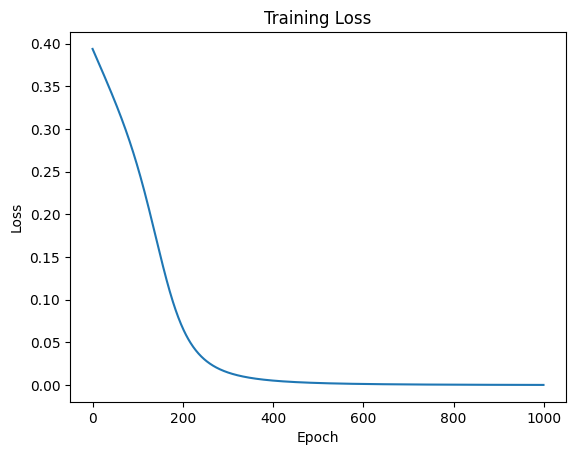

In [10]:

# Plot the loss after training
import matplotlib.pyplot as plt

# Assuming 'loss_history' is a list that stores the loss at each epoch
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
